# Exercices on clustering

In [1]:
import csv
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

import multiprocessing
# import pickle

In [5]:
def read_dataset(csv_path):
    with open(csv_path, "r") as f:
        reader = csv.reader(f)
        dataset_shape = next(reader)
        nof_instances = dataset_shape[0]
        nof_features = dataset_shape[1]
        features = np.array(next(reader))
        instances = np.array([instance for instance in reader], dtype=np.float64)
    
    return (nof_features, features, nof_instances, instances)

In [6]:
def random_color():
    r, g, b = np.random.choice(256, 3)
    color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    
    return color

In [7]:
def plot_data(features, instances, labels, size=(20, 10), title="Dataset", nof_clusters=-1, cluster_colors=None):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    if nof_clusters < 0:
        plt.scatter(instances[:,0], instances[:,1], s=2)
    else:
        cluster_labels = tuple([f"Cluster {cluster_index}" for cluster_index in range(nof_clusters)])

        if cluster_colors is None:
            cluster_colors = tuple([random_color() for _ in range(nof_clusters)])

        for cluster_index in range(nof_clusters):
            plt.scatter(instances[labels == cluster_index,0], instances[labels == cluster_index,1], c=cluster_colors[cluster_index], s=2, label=cluster_labels[cluster_index])

        plt.legend()

    plt.show()

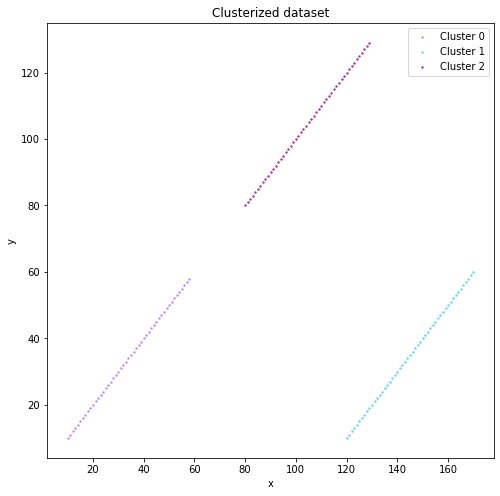

In [5]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/3-clusters.csv")

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(instances)

fst_dataset_cluster_colors = tuple([random_color() for _ in range(kmeans.n_clusters)])

plot_data(features, instances, kmeans.labels_, size=(8, 8), title="Original dataset")
plot_data(features, instances, kmeans.labels_, size=(8, 8), title="Clusterized dataset", nof_clusters=kmeans.n_clusters, cluster_colors=fst_dataset_cluster_colors)

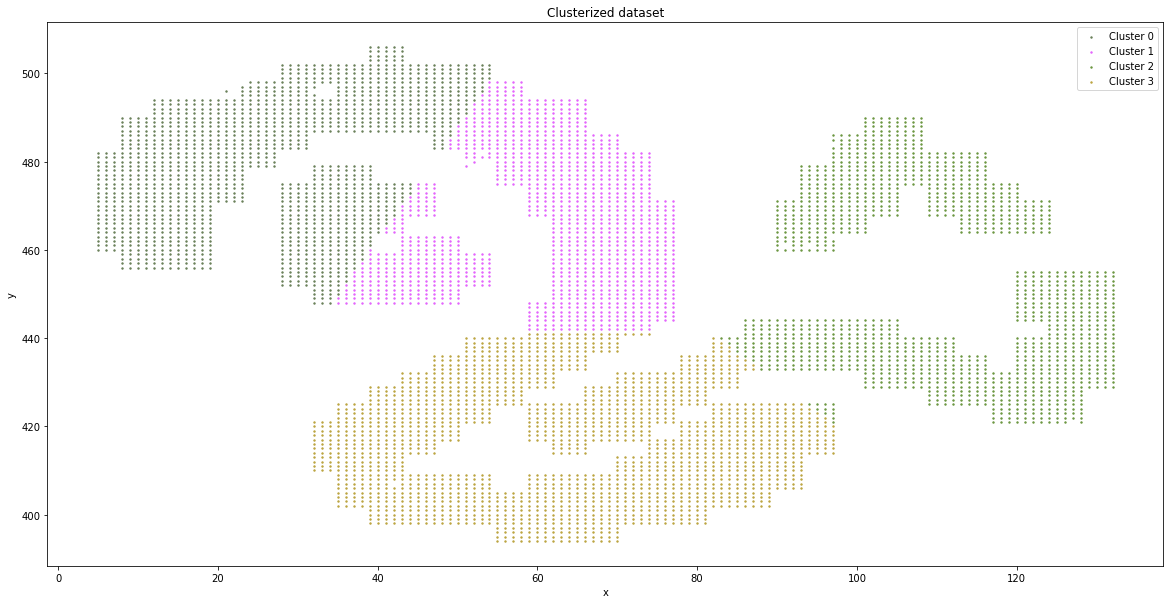

In [6]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/dataset-DBSCAN.csv")

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = kmeans.fit(instances)

snd_dataset_cluster_colors = tuple([random_color() for _ in range(kmeans.n_clusters)])

plot_data(features, instances, kmeans.labels_, title="Original dataset")
plot_data(features, instances, kmeans.labels_, title="Clusterized dataset", nof_clusters=kmeans.n_clusters, cluster_colors=snd_dataset_cluster_colors)

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

In the following cell I propose you to perform clustering with K-means on the dataset3.

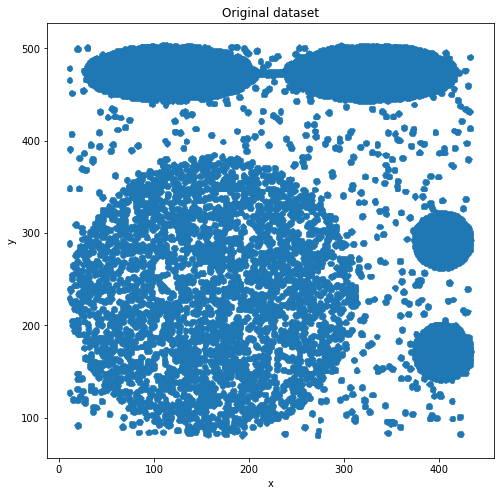

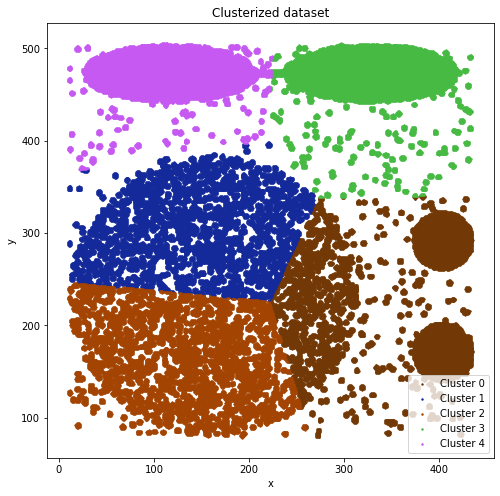

In [7]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/CURE-complete.csv")

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans = kmeans.fit(instances)

trd_dataset_cluster_colors = tuple([random_color() for _ in range(kmeans.n_clusters)])

plot_data(features, instances, kmeans.labels_, size=(8, 8), title="Original dataset")
plot_data(features, instances, kmeans.labels_, size=(8, 8), title="Clusterized dataset", nof_clusters=kmeans.n_clusters, cluster_colors=trd_dataset_cluster_colors)

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [8]:
def plot_silhouette(scores, avg_score, labels, nof_clusters, cluster_colors, size=(20, 10), title="Silhouette", margin=10):
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(111)

    ax.set_title(title)
    ax.set_ylim([0, len(labels) + (nof_clusters + 1) * margin])
    ax.set_yticks([])
    silhouette_plot_borders = np.array([margin, -1])

    cluster_labels = np.array([f"Cluster {cluster_index}" for cluster_index in range(nof_clusters)])

    for cluster_index in range(nof_clusters):
        cluster_scores = scores[labels == cluster_index]
        cluster_scores.sort()

        silhouette_plot_borders[1] = silhouette_plot_borders[0] + len(cluster_scores)

        plt.fill_betweenx(np.arange(silhouette_plot_borders[0], silhouette_plot_borders[1]), cluster_scores, color=cluster_colors[cluster_index], label=cluster_labels[cluster_index])

        ax.text(-.1, silhouette_plot_borders[0] + .5 * len(cluster_scores), str(cluster_index))
        silhouette_plot_borders[0] = silhouette_plot_borders[1] + margin

        plt.axvline(x=avg_score, ls="--", c="black")

    plt.legend()
    plt.show()

In [9]:
def plot_all(instances, labels, scores, avg_score, nof_clusters, cluster_colors, margin=10):
    fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

    # Clusterized dataset
    cluster_labels = np.array([f"Cluster {cluster_index}" for cluster_index in range(nof_clusters)])
    
    if cluster_colors is None:
        cluster_colors = tuple([random_color() for _ in range(nof_clusters)])

    for cluster_index in range(nof_clusters):
        axs[0].scatter(instances[labels == cluster_index,0], instances[labels == cluster_index,1], c=cluster_colors[cluster_index], s=2, label=cluster_labels[cluster_index])

        
    # Silhouette
    axs[1].set_ylim([0, len(labels) + (nof_clusters + 1) * margin])
    axs[1].set_yticks([])

    silhouette_plot_borders = np.array([margin, -1])

    for cluster_index in range(nof_clusters):
        cluster_scores = scores[labels == cluster_index]
        cluster_scores.sort()

        silhouette_plot_borders[1] = silhouette_plot_borders[0] + len(cluster_scores)

        axs[1].fill_betweenx(np.arange(silhouette_plot_borders[0], silhouette_plot_borders[1]), cluster_scores, color=cluster_colors[cluster_index], label=cluster_labels[cluster_index])

        axs[1].text(-.1, silhouette_plot_borders[0] + .5 * len(cluster_scores), str(cluster_index))
        silhouette_plot_borders[0] = silhouette_plot_borders[1] + margin

        axs[1].axvline(x=avg_score, ls="--", c="black")

    axs[0].legend()
    axs[1].legend()
    plt.show()

In [10]:
def get_best_clusterer(nof_clusters, max_iter):
    best_clusterer = None
    max_avg_score = 0
    avg_scores = []

    # The best seed is contained inside best_clusterer.random_state
    for i in range(max_iter):
        kmeans = KMeans(n_clusters=nof_clusters, random_state=i)
        kmeans = kmeans.fit(instances)

        avg_score = silhouette_score(instances, kmeans.labels_)
        avg_scores.append(avg_score)

        if avg_score > max_avg_score:
            max_avg_score = avg_score
            best_clusterer = kmeans
    
    return (best_clusterer, max_avg_score, np.array(avg_scores))

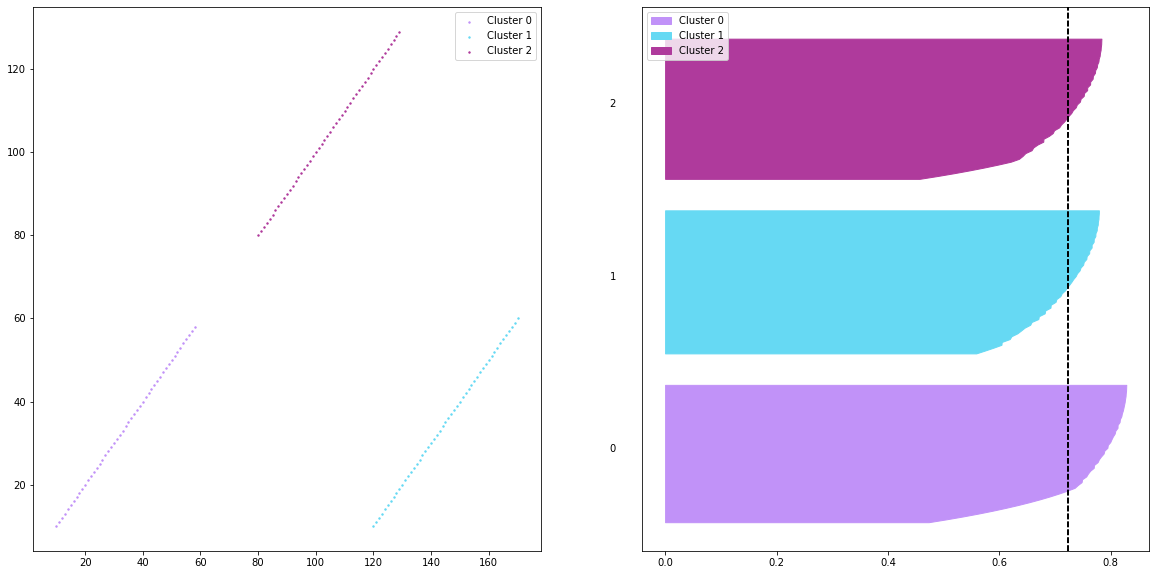

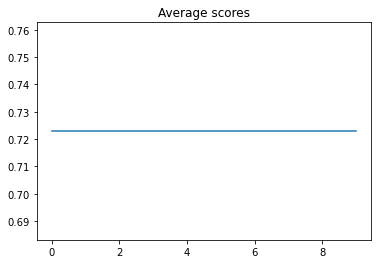

In [11]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/3-clusters.csv")
best_clusterer, max_avg_score, avg_scores = get_best_clusterer(3, 10)

silhouette_scores = silhouette_samples(instances, best_clusterer.labels_)

# plot_data(features, instances, best_clusterer.labels_, size=(8, 8), title="Original dataset")
# plot_data(features, instances, best_clusterer.labels_, size=(8, 8), title="Clusterized dataset", nof_clusters=best_clusterer.n_clusters, cluster_colors=fst_dataset_cluster_colors)
# plot_silhouette(silhouette_scores, max_avg_score, best_clusterer.labels_, best_clusterer.n_clusters, fst_dataset_cluster_colors, size=(8, 8))

plot_all(instances, best_clusterer.labels_, silhouette_scores, max_avg_score, best_clusterer.n_clusters, fst_dataset_cluster_colors)

plt.plot(avg_scores)
plt.title("Average scores")
plt.show()

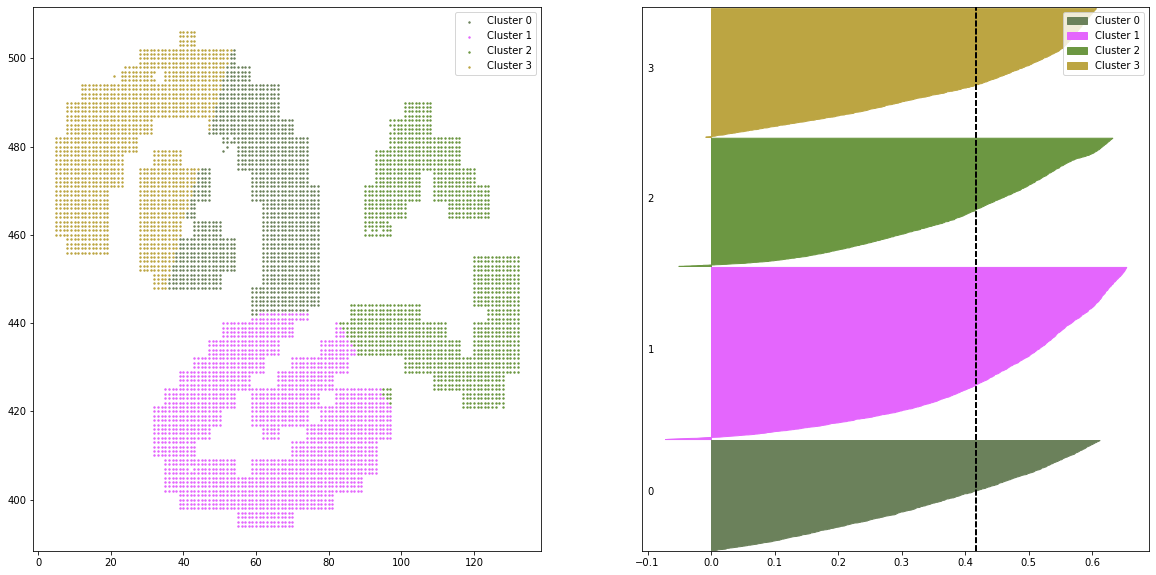

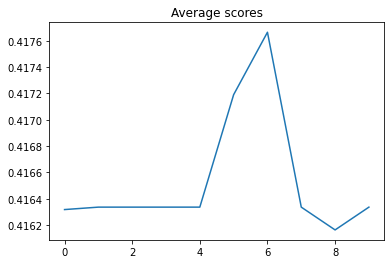

In [16]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/dataset-DBSCAN.csv")
best_clusterer, max_avg_score, avg_scores = get_best_clusterer(4, 10)

silhouette_scores = silhouette_samples(instances, best_clusterer.labels_)

# plot_data(features, instances, best_clusterer.labels_, title="Original dataset")
# plot_data(features, instances, best_clusterer.labels_, title="Clusterized dataset", nof_clusters=best_clusterer.n_clusters, cluster_colors=snd_dataset_cluster_colors)
# plot_silhouette(silhouette_scores, max_avg_score, best_clusterer.labels_, best_clusterer.n_clusters, snd_dataset_cluster_colors)

plot_all(instances, best_clusterer.labels_, silhouette_scores, max_avg_score, best_clusterer.n_clusters, snd_dataset_cluster_colors)

plt.plot(avg_scores)
plt.title("Average scores")
plt.show()

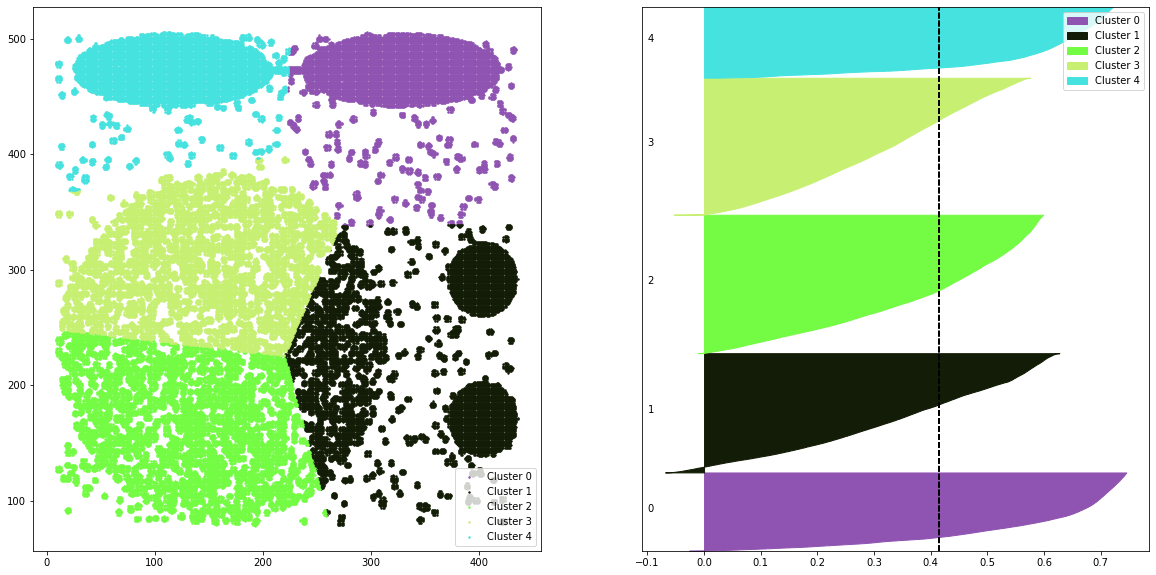

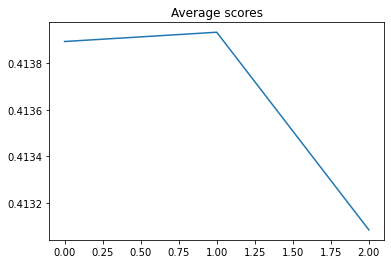

In [37]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/CURE-complete.csv")
best_clusterer, max_avg_score, avg_scores = get_best_clusterer(5, 3)

silhouette_scores = silhouette_samples(instances, best_clusterer.labels_)

# plot_data(features, instances, best_clusterer.labels_, title="Original dataset")
# plot_data(features, instances, best_clusterer.labels_, title="Clusterized dataset", nof_clusters=best_clusterer.n_clusters, cluster_colors=trd_dataset_cluster_colors)
# plot_silhouette(silhouette_scores, max_avg_score, best_clusterer.labels_, best_clusterer.n_clusters, trd_dataset_cluster_colors)

plot_all(instances, best_clusterer.labels_, silhouette_scores, max_avg_score, best_clusterer.n_clusters, trd_dataset_cluster_colors)

plt.plot(avg_scores)
plt.title("Average scores")
plt.show()

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

In [27]:
def get_best_k(instances, max_iter):
    best_k = 2
    best_avg_score = 0
    avg_scores = []

    for k in range(2, max_iter):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans = kmeans.fit(instances)
        avg_score = silhouette_score(instances, kmeans.labels_)
        avg_scores.append(avg_score)

        if avg_score > best_avg_score:
            best_avg_score = avg_score
            best_k = k
    
    return (best_k, best_avg_score, np.array(avg_scores))

In [25]:
def get_best_k_mp(nof_clusters):
    kmeans = KMeans(n_clusters=instances, random_state=0)
    kmeans = kmeans.fit(instances)
    avg_score = silhouette_score(instances, kmeans.labels_)
    
    return (nof_clusters, avg_score)

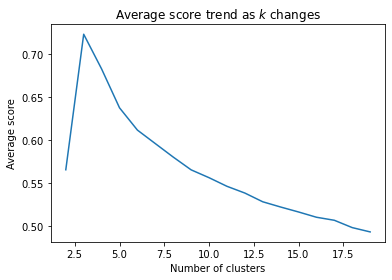

The best average score is 0.7229402453727759 obtained with k = 3


In [58]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/3-clusters.csv")

max_iter = 20
best_k, best_avg_score, avg_scores = get_best_k(instances, max_iter)

plt.plot(np.array([i for i in range(2, max_iter)]), avg_scores)
plt.title("Average score trend as $k$ changes")
plt.xlabel("Number of clusters")
plt.ylabel("Average score")
plt.show()

print(f"The best average score is {best_avg_score} obtained with k = {best_k}")

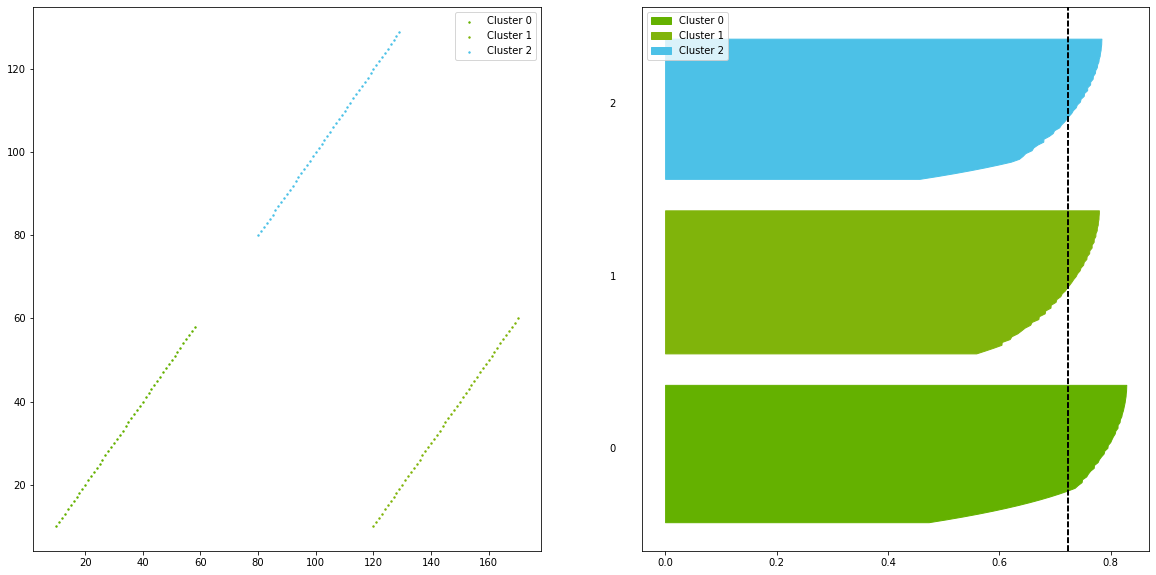

The best average score is 0.7229402453727759 obtained with k = 3 and after 10 tests


In [59]:
max_iter = 10
best_clusterer, max_avg_score, avg_scores = get_best_clusterer(best_k, max_iter)
silhouette_scores = silhouette_samples(instances, best_clusterer.labels_)

# plot_data(features, instances, best_clusterer.labels_, size=(8, 8), title="Original dataset")
# plot_data(features, instances, best_clusterer.labels_, size=(8, 8), title="Clusterized dataset", nof_clusters=best_clusterer.n_clusters, cluster_colors=fst_dataset_cluster_colors)
# plot_silhouette(silhouette_scores, max_avg_score, best_clusterer.labels_, best_clusterer.n_clusters, fst_dataset_cluster_colors, size=(8, 8))

plot_all(instances, best_clusterer.labels_, silhouette_scores, max_avg_score, best_clusterer.n_clusters, fst_dataset_cluster_colors)

print(f"The best average score is {max_avg_score} obtained with k = {best_k} and after {max_iter} tests")

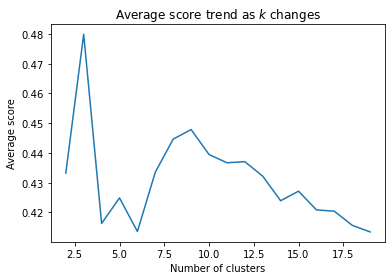

The best average score is 0.47990375400749513 obtained with k = 3


In [56]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/dataset-DBSCAN.csv")

max_iter = 20
best_k, best_avg_score, avg_scores = get_best_k(instances, max_iter)

plt.plot(np.array([i for i in range(2, max_iter)]), avg_scores)
plt.title("Average score trend as $k$ changes")
plt.xlabel("Number of clusters")
plt.ylabel("Average score")
plt.show()

print(f"The best average score is {best_avg_score} obtained with k = {best_k}")

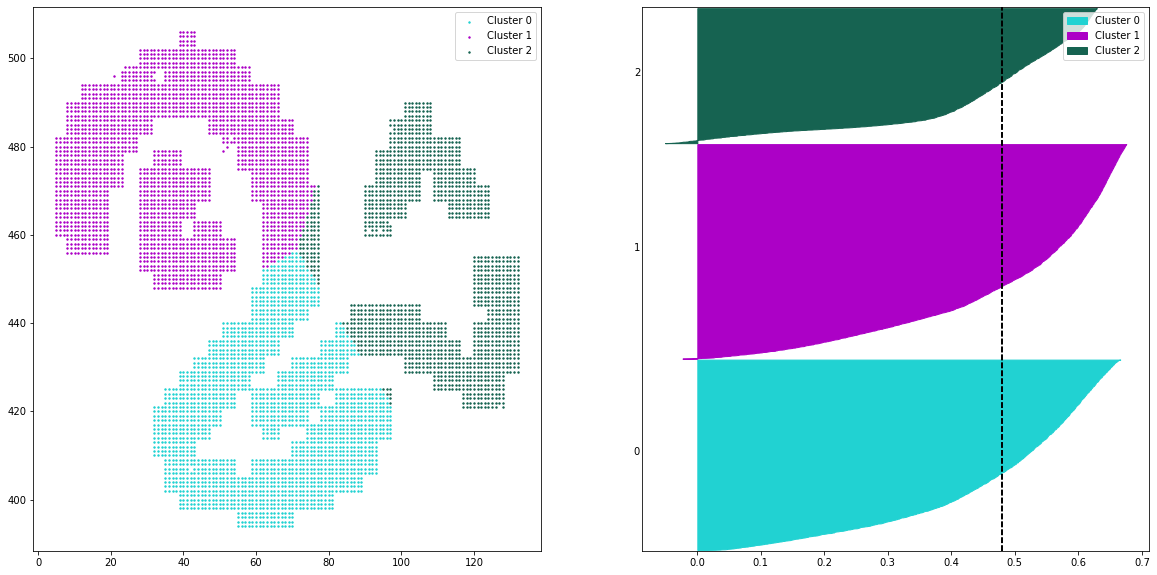

The best average score is 0.48006914019384417 obtained with k = 3 and after 10 tests


In [57]:
max_iter = 10
best_clusterer, max_avg_score, avg_scores = get_best_clusterer(best_k, max_iter)
silhouette_scores = silhouette_samples(instances, best_clusterer.labels_)

# plot_data(features, instances, best_clusterer.labels_, title="Original dataset")
# plot_data(features, instances, best_clusterer.labels_, title="Clusterized dataset", nof_clusters=best_clusterer.n_clusters, cluster_colors=snd_dataset_cluster_colors)
# plot_silhouette(silhouette_scores, max_avg_score, best_clusterer.labels_, best_clusterer.n_clusters, snd_dataset_cluster_colors)

plot_all(instances, best_clusterer.labels_, silhouette_scores, max_avg_score, best_clusterer.n_clusters, snd_dataset_cluster_colors)

print(f"The best average score is {max_avg_score} obtained with k = {best_k} and after {max_iter} tests")

In [ ]:
# TEST MULTIPROCESSING
func_args = [k for k in range(2, max_iter)]

r = []
with multiprocessing.Pool() as pool:
    r.append(pool.map(get_best_k_mp, func_args))
print(r)

In [28]:
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/CURE-complete.csv")

max_iter = 10
best_k, best_avg_score, avg_scores = get_best_k(instances, max_iter)

plt.plot(np.array([i for i in range(2, max_iter)]), avg_scores)
plt.title("Average score trend as $k$ changes")
plt.xlabel("Number of clusters")
plt.ylabel("Average score")
plt.show()

print(f"The best average score is {best_avg_score} obtained with k = {best_k}")

The best average score is 0.4284794777079654 obtained with k = 6


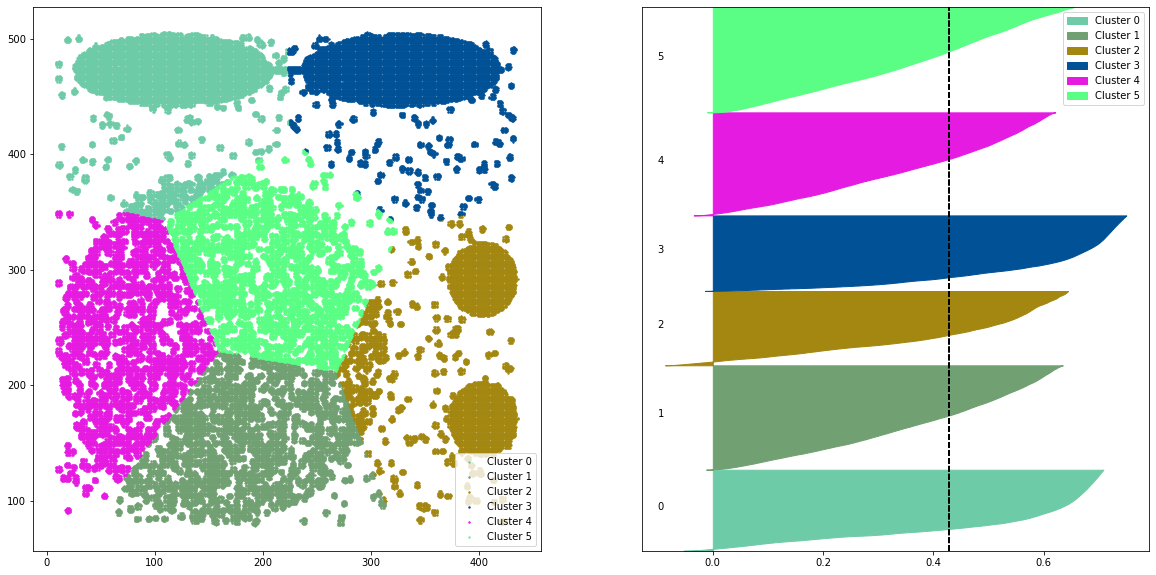

The best average score is 0.4284794777079654 obtained with k = 6 and after 3 tests


In [63]:
max_iter = 3
best_clusterer, max_avg_score, avg_scores = get_best_clusterer(best_k, max_iter)
silhouette_scores = silhouette_samples(instances, best_clusterer.labels_)

# plot_data(features, instances, best_clusterer.labels_, title="Original dataset")
# plot_data(features, instances, best_clusterer.labels_, title="Clusterized dataset", nof_clusters=best_clusterer.n_clusters, cluster_colors=trd_dataset_cluster_colors)
# plot_silhouette(silhouette_scores, max_avg_score, best_clusterer.labels_, best_clusterer.n_clusters, trd_dataset_cluster_colors)

plot_all(instances, best_clusterer.labels_, silhouette_scores, max_avg_score, best_clusterer.n_clusters, None)

print(f"The best average score is {max_avg_score} obtained with k = {best_k} and after {max_iter} tests")

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In [229]:
# nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/CURE-complete.csv")
nof_features, features, nof_instances, instances = read_dataset("Datasets for clustering/dataset-DBSCAN.csv")

dbscan = DBSCAN(eps=2, min_samples=8)
dbscan = dbscan.fit(instances)
nof_clusters = len(set(dbscan.labels_)) - (1 if -1 in set(dbscan.labels_) else 0)

plot_data(features, instances, dbscan.labels_, nof_clusters=nof_clusters, title="Clusterized dataset")

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

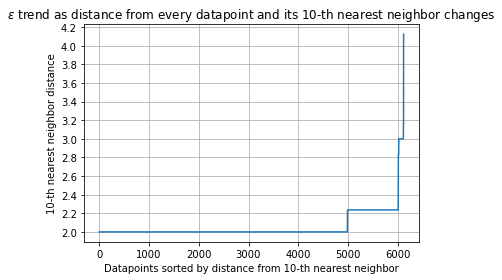

In [246]:
minpts = 10
neighbors = NearestNeighbors(n_neighbors=minpts + 1)
neighbors = neighbors.fit(instances)

# The first element is the distance between a point and itself (i.e. it is always zero)
distances, indexes = neighbors.kneighbors(instances)

# Sort over the rows
distances.sort(axis=0)

plt.plot(np.arange(len(distances)), distances[:,-1])
plt.yticks(np.arange(np.min(distances[:,-1]), np.max(distances[:,-1]) + 0.2, 0.2))
plt.xlabel(f"Datapoints sorted by distance from {minpts}-th nearest neighbor")
plt.ylabel(f"{minpts}-th nearest neighbor distance")
plt.title(r"$\varepsilon$ trend as distance from every datapoint and its {}-th nearest neighbor changes".format(minpts))
plt.grid()
plt.show()

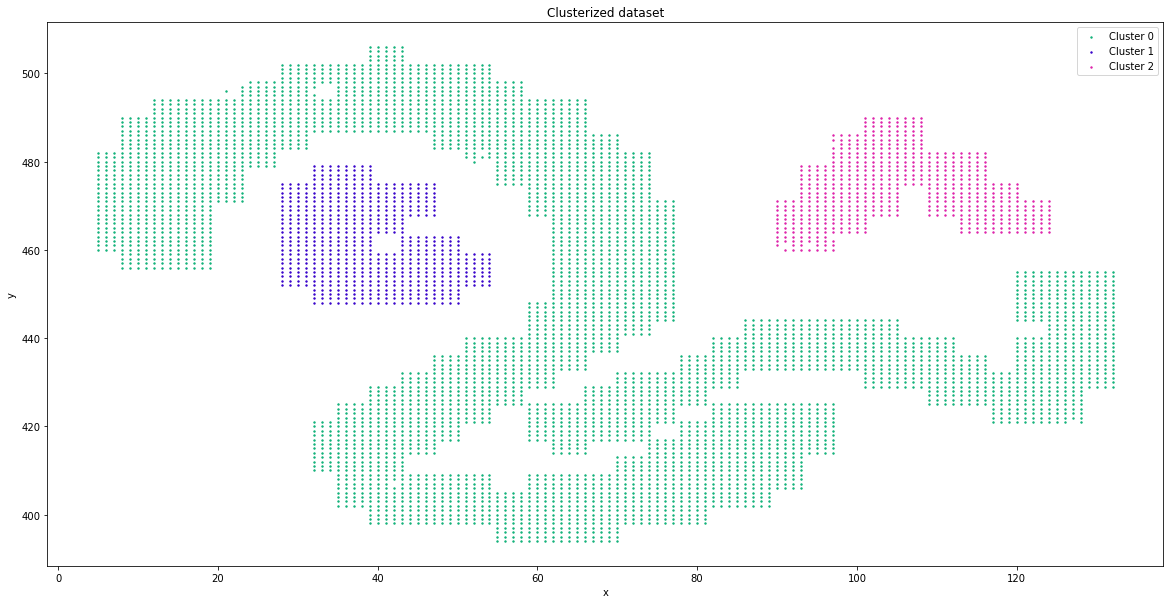

In [251]:
dbscan = DBSCAN(eps=2.2, min_samples=10)
dbscan = dbscan.fit(instances)
nof_clusters = len(set(dbscan.labels_)) - (1 if -1 in set(dbscan.labels_) else 0)

plot_data(features, instances, dbscan.labels_, nof_clusters=nof_clusters, title="Clusterized dataset")